## Importing the initially required libraries

What are you going to learn with this Kernel?
Atribute information Analysis.
Categorical to Continuous/Dummies Easy way
Machine Learning (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, GradientBoostingClassifier, XGBClassifier, GaussianNB)
ROC curve
How to understand the problem and see which is the best model for your Dependent Variable
Precision, Recall, F1, Avg_total Analysis
Bank Marketing
Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Attribute Information:
Bank client data:

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 
'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client
was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings ('ignore')          #ignore any future warnings

## 1) Primary Analysis

In [22]:
df = pd.read_csv('C:/Users/User/Downloads/bank_data.csv',sep=';')

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.shape

(41188, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## 2) a) MISSING VALUE ANALYSIS

In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# There are no Null Values in our Data

## 2) Exploratory Data Analysis

## univeriate analysis

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
catcols=df.select_dtypes(include=['object'])

In [36]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [37]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [38]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [39]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [40]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

In [41]:
df['education']=df['education'].replace(to_replace=['basic.9y','basic.4y','basic.6y'],value=['basic','basic','basic'])

### Combining all education categories having basic into one

In [42]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [43]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Our target variable is imbalanced. We will have to balance it using SMOTE later.

## Visualisation

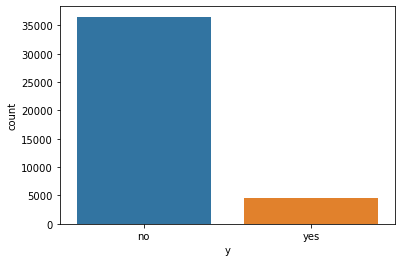

In [44]:
%matplotlib inline
sns.countplot(x='y',data=df)
plt.show()

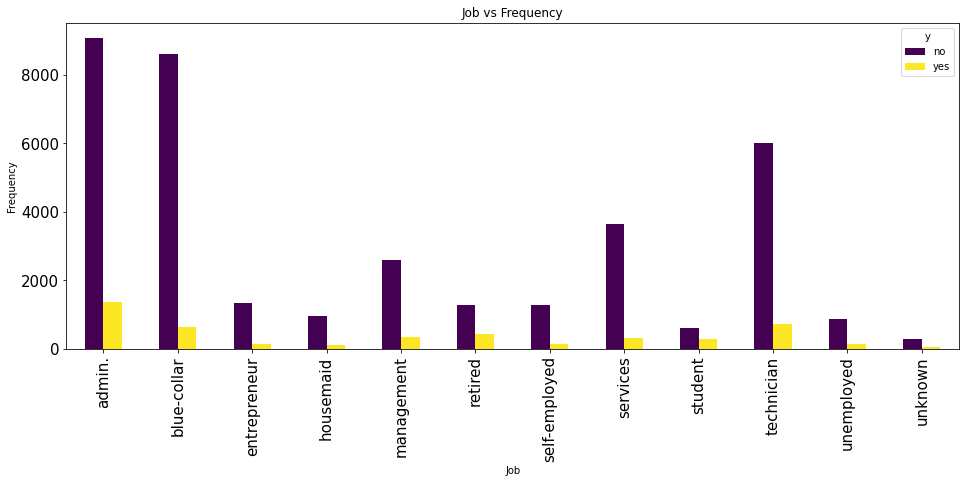

In [45]:
pd.crosstab(df.job,df.y).plot(kind= 'bar',colormap = 'viridis',figsize=(16,6),fontsize=15)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job vs Frequency')
plt.show()

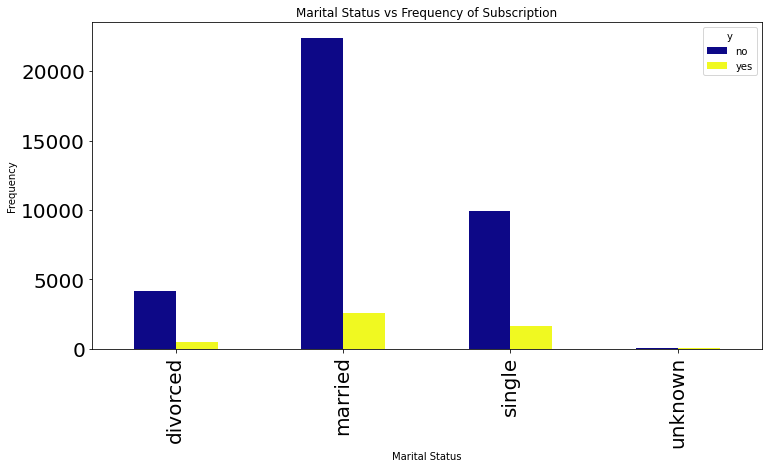

In [46]:
pd.crosstab(df.marital,df.y).plot(kind = 'bar',colormap = 'plasma', figsize=(12,6),fontsize=20)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title("Marital Status vs Frequency of Subscription")
plt.show()

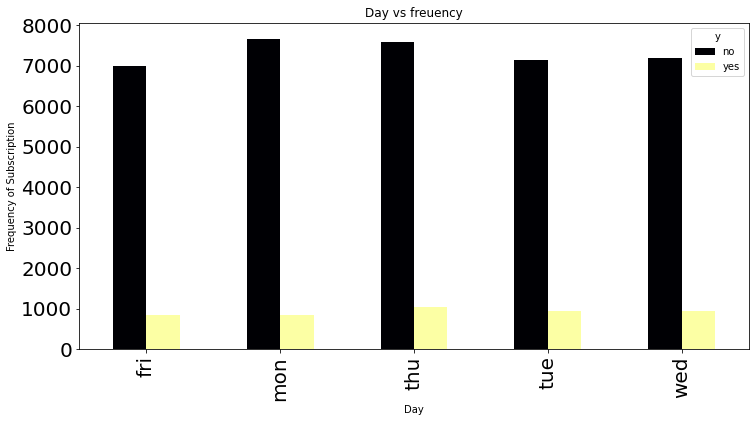

In [47]:
pd.crosstab(df.day_of_week,df.y).plot(kind = 'bar',colormap = 'inferno', figsize=(12,6),fontsize=20)
plt.xlabel('Day')
plt.ylabel('Frequency of Subscription')
plt.title("Day vs freuency")
plt.show()

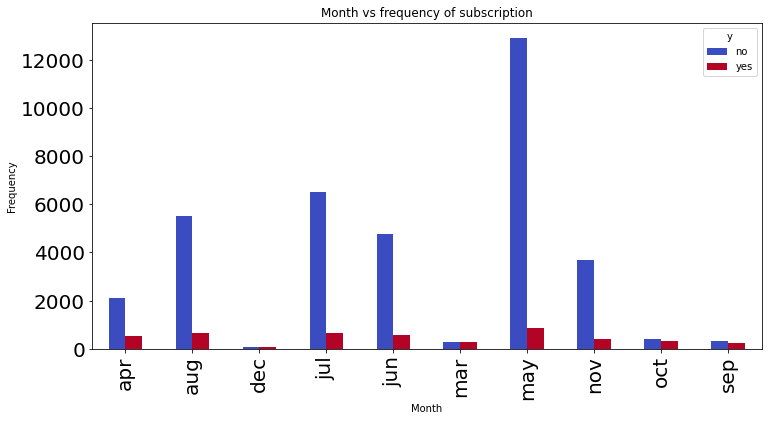

In [48]:
pd.crosstab(df.month,df.y).plot(kind = 'bar',colormap = 'coolwarm', figsize=(12,6),fontsize=20)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title("Month vs frequency of subscription")
plt.show()

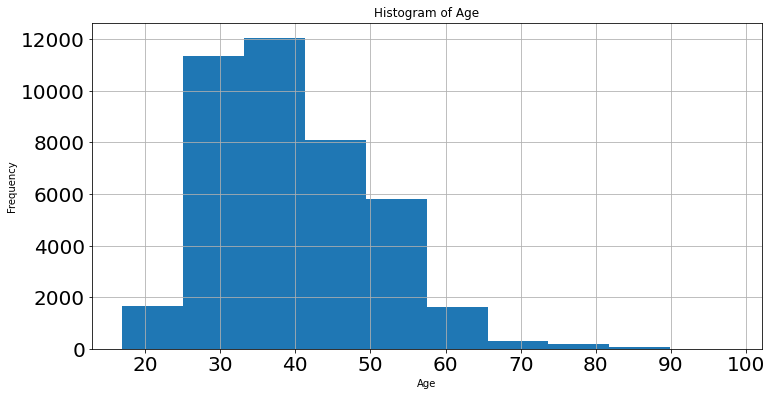

In [49]:
df.age.hist(figsize = (12,6), xlabelsize = 20, ylabelsize = 20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [50]:
df_num = df.select_dtypes(['int64','float64'])  #Selecting all numeric columns
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


age


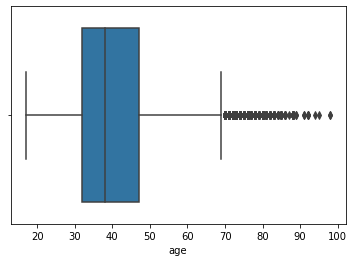

duration


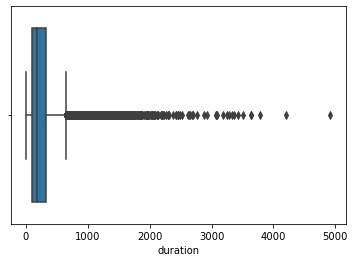

campaign


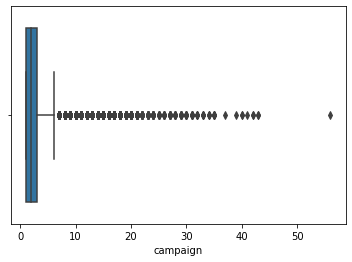

pdays


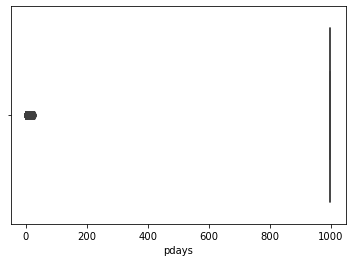

previous


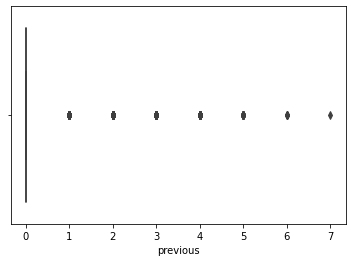

emp.var.rate


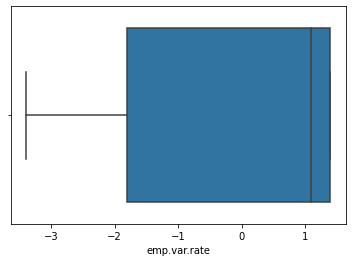

cons.price.idx


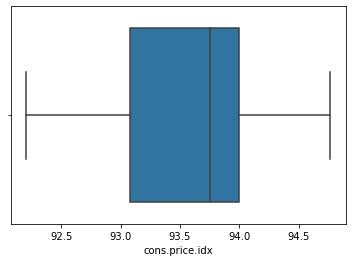

cons.conf.idx


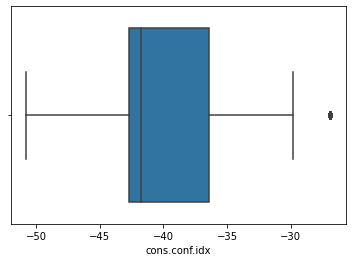

euribor3m


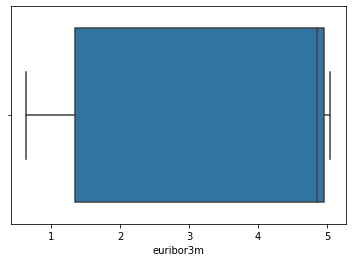

nr.employed


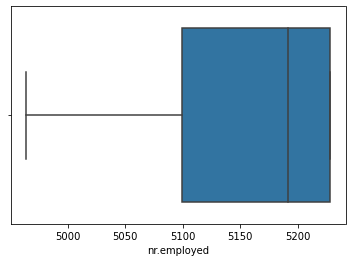

In [51]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df_num[i])
    plt.show()

### Itseems like there are more outliers in age,duration and campaign


In [52]:
l=[0,10,11]
def Outlier(df):
    for column in df.iloc[:,l].columns:
        if df[column].dtype!='str':
            Q1=df[column].quantile(0.25)
            Q3=df[column].quantile(0.75)
            IQR= Q3-Q1
            lower=Q1-(1.5* IQR)
            upper=Q3+(1.5* IQR)
            df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
            df.loc[:,column] =np.where(df[column].values<lower,lower,df[column].values)
    return df
 
df2=Outlier(df)
print(df2.columns)
print(df2.head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
    age        job  marital    education  default housing loan    contact  \
0  56.0  housemaid  married        basic       no      no   no  telephone   
1  57.0   services  married  high.school  unknown      no   no  telephone   
2  37.0   services  married  high.school       no     yes   no  telephone   
3  40.0     admin.  married        basic       no      no   no  telephone   
4  56.0   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...       1.0    999         0  nonexistent          1.1   
1   may         mon  ...       1.0    999         0  nonexistent          1.1   

age


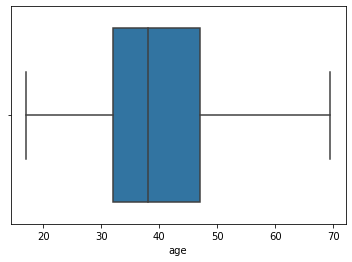

duration


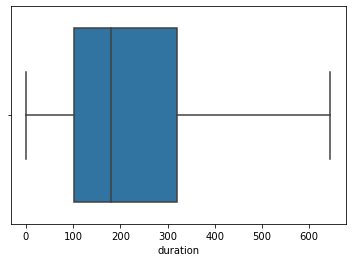

campaign


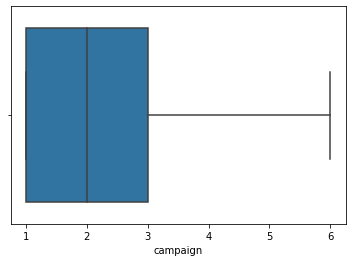

pdays


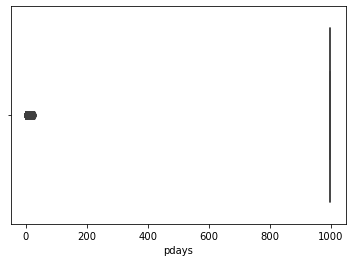

previous


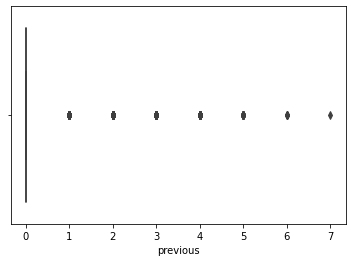

emp.var.rate


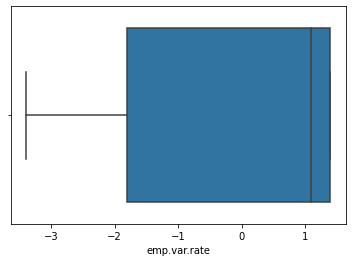

cons.price.idx


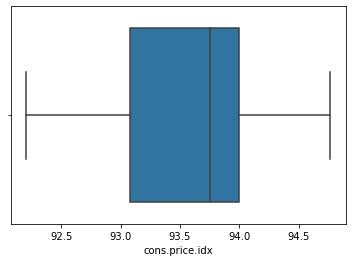

cons.conf.idx


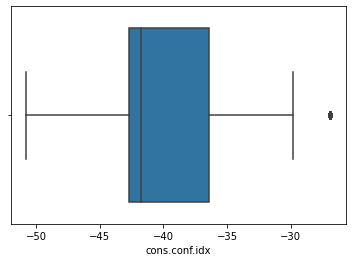

euribor3m


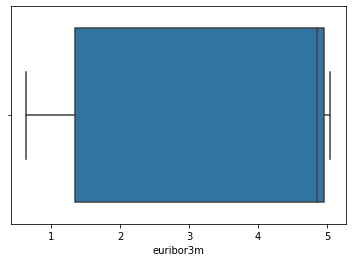

nr.employed


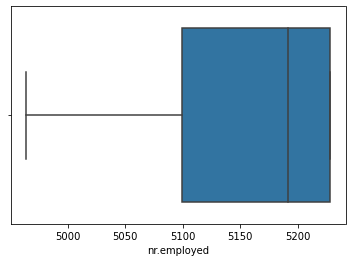

In [53]:
for i in df_num.columns:
    print(i)
    sns.boxplot(df2[i])
    plt.show()

## Outliers are removed

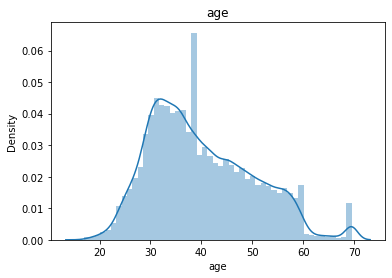

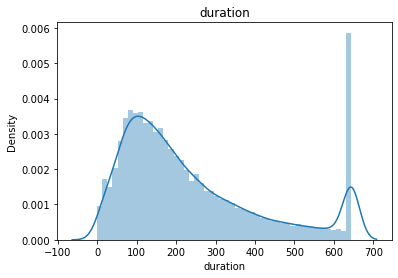

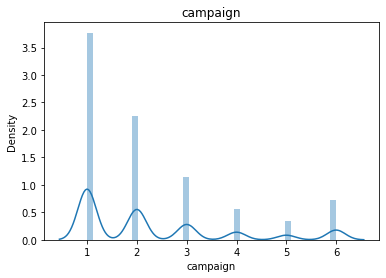

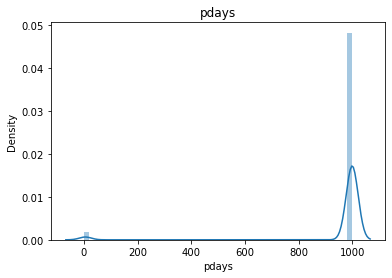

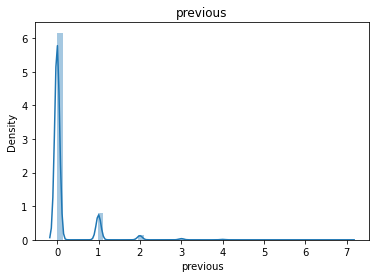

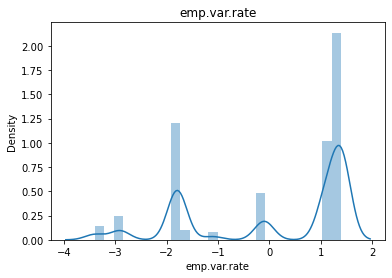

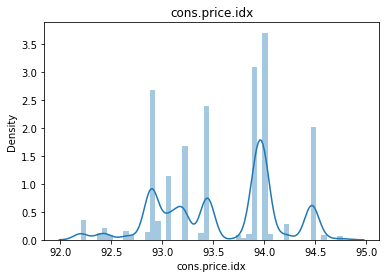

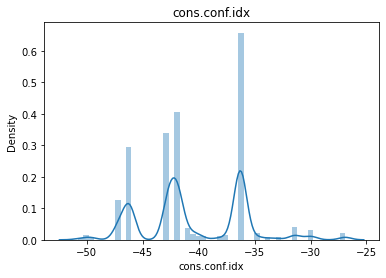

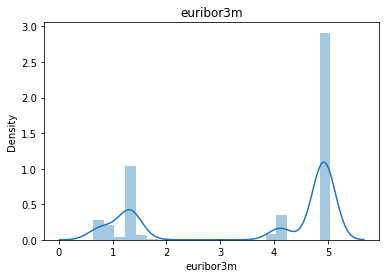

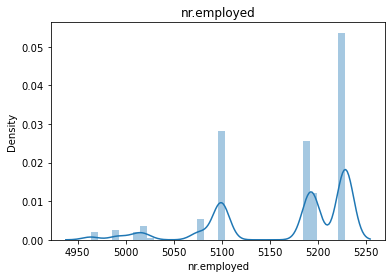

In [54]:
for i in df_num.columns:
    sns.distplot(df2[i])
    plt.title(i)
    plt.show()

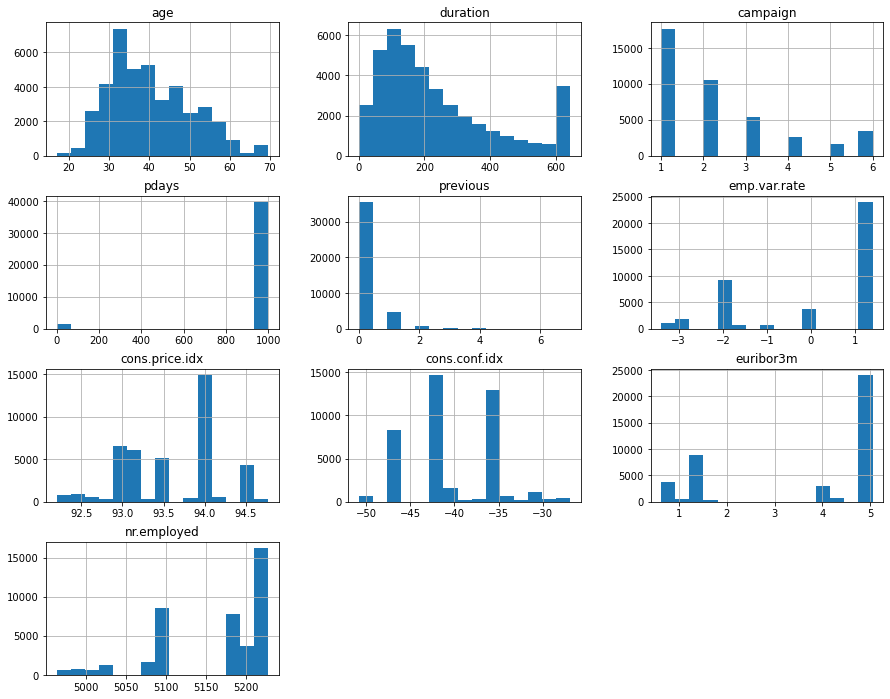

In [55]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

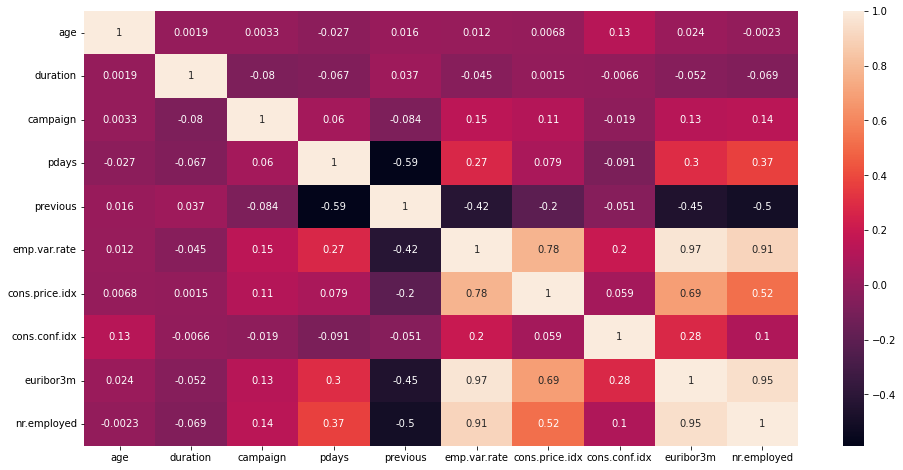

In [57]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [58]:
df.describe(include = 'O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,3,2,10,5,3,2
top,admin.,married,basic,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563,36548


In [59]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.939485,234.997317,2.275274,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.129367,177.353309,1.550510,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.500000,644.500000,6.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [60]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2) b)LABEL ENCODING OR GET DUMMIES

In [62]:
df_d= pd.get_dummies(data = df2, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome'])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   contact                        41188 non-null  object 
 2   month                          41188 non-null  object 
 3   day_of_week                    41188 non-null  object 
 4   duration                       41188 non-null  float64
 5   campaign                       41188 non-null  float64
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

In [104]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_d['contact']     = labelencoder_X.fit_transform(df_d['contact']) 
df_d['month']       = labelencoder_X.fit_transform(df_d['month']) 
df_d['day_of_week'] = labelencoder_X.fit_transform(df_d['day_of_week'])
df_d['y'] = labelencoder_X.fit_transform(df_d['y'])

In [105]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  float64
 1   contact                        41188 non-null  int64  
 2   month                          41188 non-null  int64  
 3   day_of_week                    41188 non-null  int64  
 4   duration                       41188 non-null  float64
 5   campaign                       41188 non-null  float64
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

In [106]:
df_d.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,1,6,1,261.0,1.0,999,0,1.1,93.994,...,0,1,0,0,1,0,0,0,1,0
1,57.0,1,6,1,149.0,1.0,999,0,1.1,93.994,...,0,1,0,0,1,0,0,0,1,0
2,37.0,1,6,1,226.0,1.0,999,0,1.1,93.994,...,0,0,0,1,1,0,0,0,1,0
3,40.0,1,6,1,151.0,1.0,999,0,1.1,93.994,...,0,1,0,0,1,0,0,0,1,0
4,56.0,1,6,1,307.0,1.0,999,0,1.1,93.994,...,0,1,0,0,0,0,1,0,1,0


In [107]:
df_d.columns

Index(['age', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

## 2) c) Selecting important features based on Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [109]:
X = df_d.drop(['y','contact', 'month', 'day_of_week'] , axis = 1)
y = df_d['y']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

## 2) e) We will scale the data and check accuracy

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge

In [111]:
from sklearn.preprocessing import MinMaxScaler

mc = MinMaxScaler()

x_train_mc = mc.fit_transform(X_train)

x_test_mc = mc.transform(X_test)

In [112]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [113]:
models = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       XGBClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
       svm.SVC()
    
    
]

In [114]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


MLA = [
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       XGBClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       svm.SVC()
    
    
]

In [115]:
names=[
       'BaggingClassifier',
       'GradientBoostingClassifier',
       'RandomForestClassifier', 
       'SGDClassifier',
       'XGBClassifier',
       'GaussianNB',
       'KNeighborsClassifier',
       'DecisionTreeClassifier',
       'SVC']

In [116]:
testscore = []
trainscore = []
for model in MLA:
        model.fit(x_train_mc,y_train)
        test_pred = model.predict(X_test_mc)
        testscore.append(accuracy_score(y_test,test_pred))
        train_pred = model.predict(X_train_mc)
        trainscore.append(accuracy_score(y_train, train_pred))

comparison_2 = pd.DataFrame({"names": names, "testscore": testscore, 'trainscore': trainscore })
comparison_2

,names,testscore,trainscore
0,BaggingClassifier,0.903941,0.993895
1,GradientBoostingClassifier,0.911063,0.919878
2,RandomForestClassifier,0.905155,0.999861
3,SGDClassifier,0.898762,0.904027
4,XGBClassifier,0.906369,0.961153
5,GaussianNB,0.738933,0.744511
6,KNeighborsClassifier,0.891559,0.921231
7,DecisionTreeClassifier,0.882577,0.999931
8,SVC,0.898276,0.908744


In [80]:
y_train.value_counts()

no     25645
yes     3186
Name: y, dtype: int64

## 2) d) Since target variable is imbalanced, we apply SMOTE to balance them

In [ ]:
from imblearn.over_sampling import SMOTE            #We use SMOTE for imbalanced classification
from collections import Counter
counter = Counter(y_train)
print('Before Smote:', counter)
smt = SMOTE(random_state=0)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter1 = Counter(y_train_sm)
print('After Smote:',counter1)

## 3) Build the following Supervised Learning models:
## a. Logistic Regression
## b. AdaBoost
## c. Naïve Bayes
## d. KNN
## e. SVM

In [ ]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train_sm, y_train_sm)
    test_pred = alg.predict(X_test)
    testscore.append(accuracy_score(y_test,test_pred))
    train_pred = alg.predict(X_train_sm)
    trainscore.append(accuracy_score(y_train_sm, train_pred))
    print(classification_report(y_test,test_pred))   
    print(alg.__class__.__name__)
    print(confusion_matrix(y_test,test_pred))

## 4)  performance metrics of all the above models

In [47]:
comparison_3 = pd.DataFrame({"name": name, "test score": testscore, 'train score': trainscore })
comparison_3

,name,test score,train score
0,LogisticRegression,0.881767,0.905462
1,AdaBoostClassifier,0.902565,0.936623
2,BaggingClassifier,0.904508,0.997048
3,GradientBoostingClassifier,0.903698,0.943328
4,RandomForestClassifier,0.908797,0.999922
5,SGDClassifier,0.892531,0.812625
6,XGBClassifier,0.910253,0.975584
7,GaussianNB,0.728170,0.819154
8,KNeighborsClassifier,0.847131,0.936799
9,DecisionTreeClassifier,0.885733,0.999922


# PART 2: TIME SERIES

In [175]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [176]:
data=pd.read_csv('C:/Users/DELL/Downloads/exam/MonthWiseMarketArrivals_Clean.csv')

In [177]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [178]:
data.shape

(10227, 10)

In [179]:
data.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [180]:
data.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [181]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [182]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [183]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [184]:
data.date = pd.DatetimeIndex(data.date)

In [185]:
data.index = pd.PeriodIndex(data.date, freq="M")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


# 1) price of onion for each month for the Mumbai 
market

In [186]:
df_mumbai = data.loc[data.city == "MUMBAI"].copy()
df_mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [187]:
df_mumbai = df_mumbai.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_mumbai.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2005-01,275845,387,2005-01-01
2006-01,228000,402,2006-01-01
2007-01,205200,997,2007-01-01
2008-01,267550,448,2008-01-01


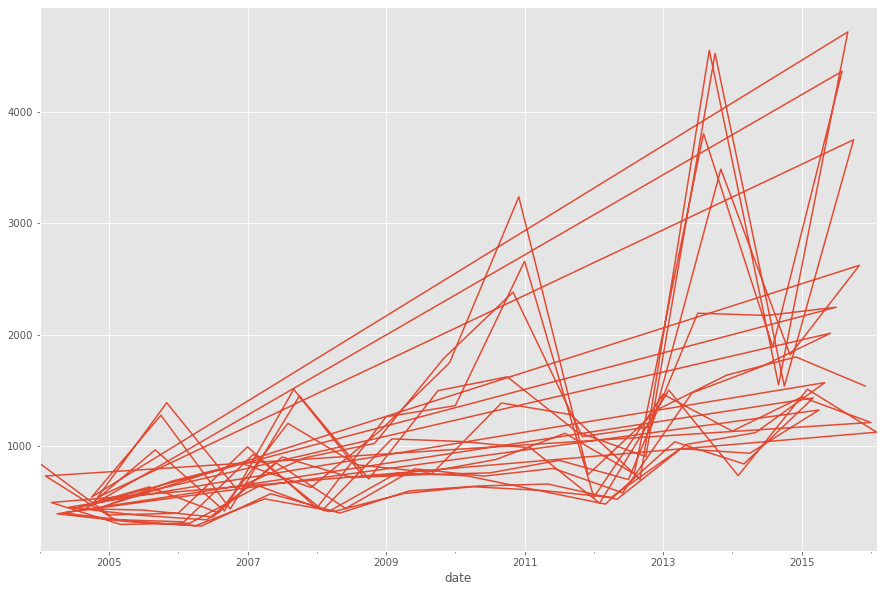

In [188]:
df_mumbai.priceMod.plot()
plt.show()

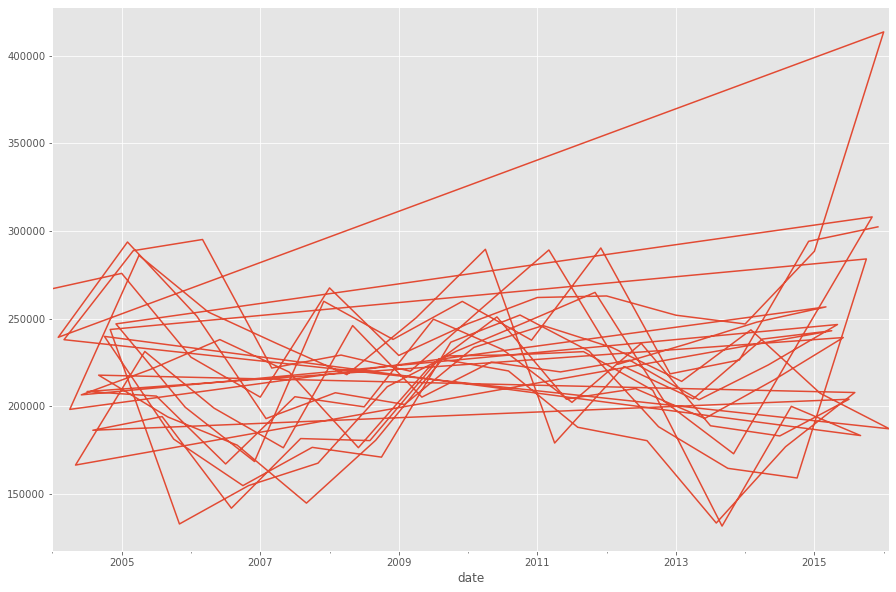

In [189]:
df_mumbai.quantity.plot()
plt.show()

# Log Transformation
# Log-transformations can help to stabilize the variance of a time series.

<AxesSubplot:ylabel='Frequency'>

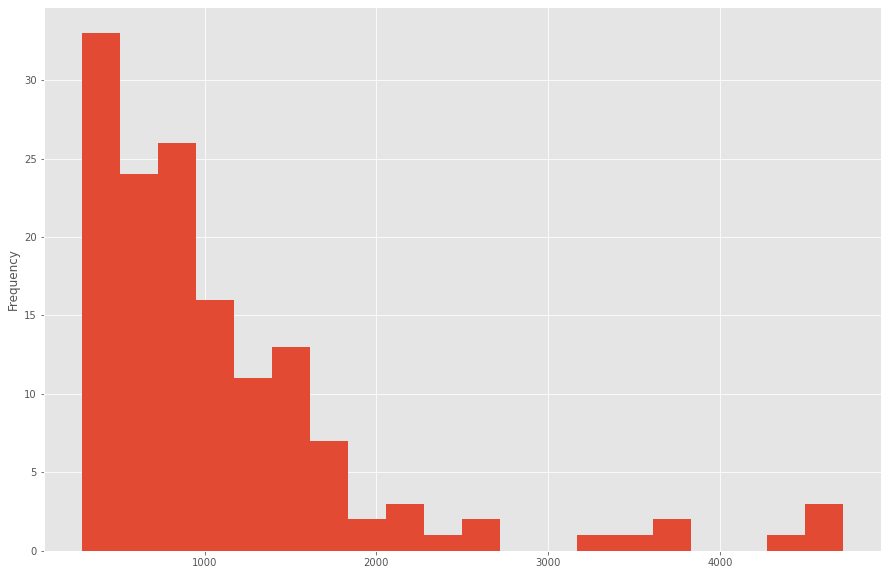

In [190]:
df_mumbai.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

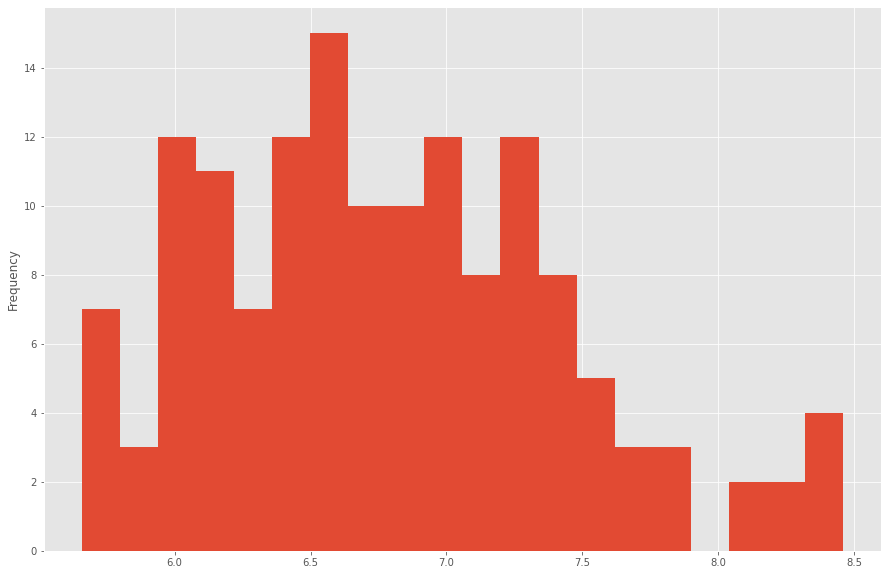

In [191]:
df_mumbai["log_priceMod"] = np.log(df_mumbai.priceMod)
df_mumbai.log_priceMod.plot(kind="hist", bins=20)

# The above histogram is more look like normal distribution

<AxesSubplot:xlabel='date'>

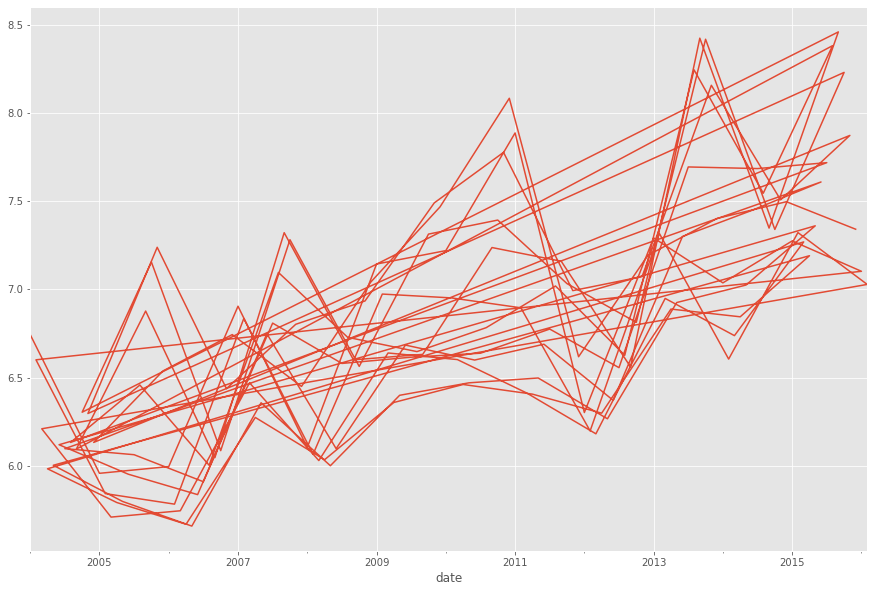

In [192]:
df_mumbai.log_priceMod.plot()

# 2) Evaluate this model using RSME

### Mean Constant Model

In [193]:
df_mumbai_mean = df_mumbai.log_priceMod.mean()
df_mumbai["mean_price"] = np.exp(df_mumbai_mean)
df_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239
2005-01,275845,387,2005-01-01,5.958425,889.100239
2006-01,228000,402,2006-01-01,5.996452,889.100239
2007-01,205200,997,2007-01-01,6.904751,889.100239
2008-01,267550,448,2008-01-01,6.104793,889.100239


In [194]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [195]:
mean_modelRMSE = RMSE(df_mumbai.priceMod, df_mumbai.mean_price)
mean_modelRMSE

908.4772843986449

In [196]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_mumbai_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889.100239,908.477284


# ACF PLOT

In [197]:
df_mumbai["shift_log_priceMod"] = df_mumbai.log_priceMod.shift()
df_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price,shift_log_priceMod
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,NaN
2005-01,275845,387,2005-01-01,5.958425,889.100239,6.744059
2006-01,228000,402,2006-01-01,5.996452,889.100239,5.958425
2007-01,205200,997,2007-01-01,6.904751,889.100239,5.996452
2008-01,267550,448,2008-01-01,6.104793,889.100239,6.904751


<AxesSubplot:xlabel='date'>

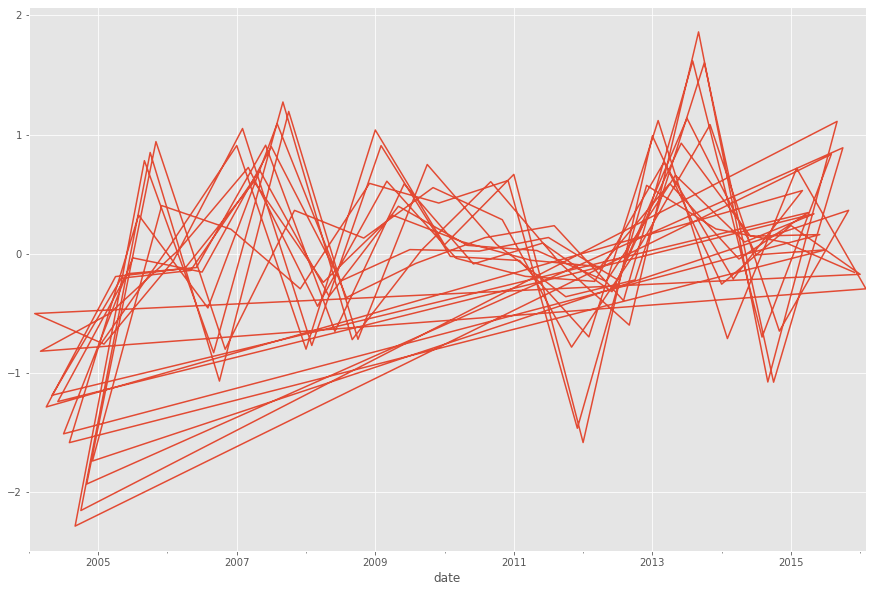

In [198]:
df_mumbai["log_priceMod_diff"] = df_mumbai.log_priceMod - df_mumbai.shift_log_priceMod
df_mumbai.log_priceMod_diff.plot()

In [199]:
ts = df_mumbai.log_priceMod
ts_diff = df_mumbai.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [200]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

# 3) ACF PLOT

<AxesSubplot:>

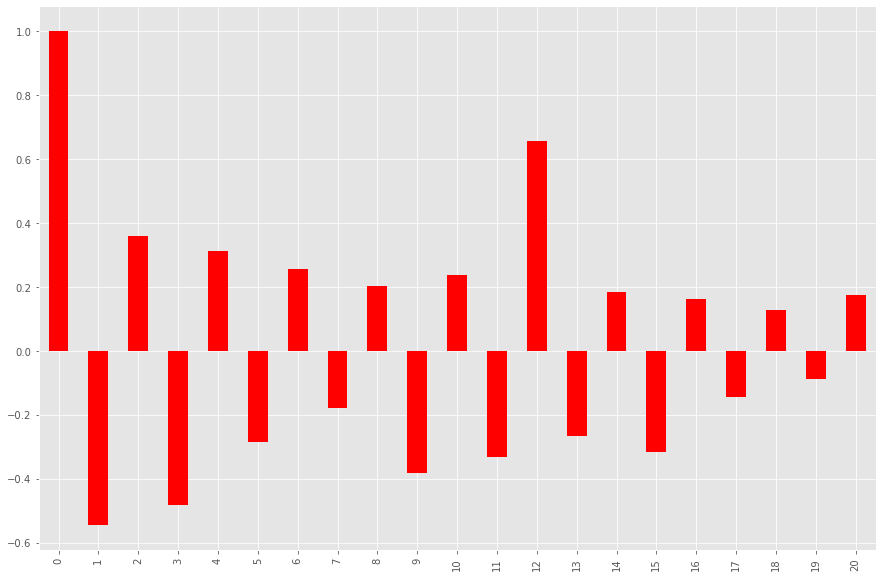

In [201]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

# PACF plot

<AxesSubplot:>

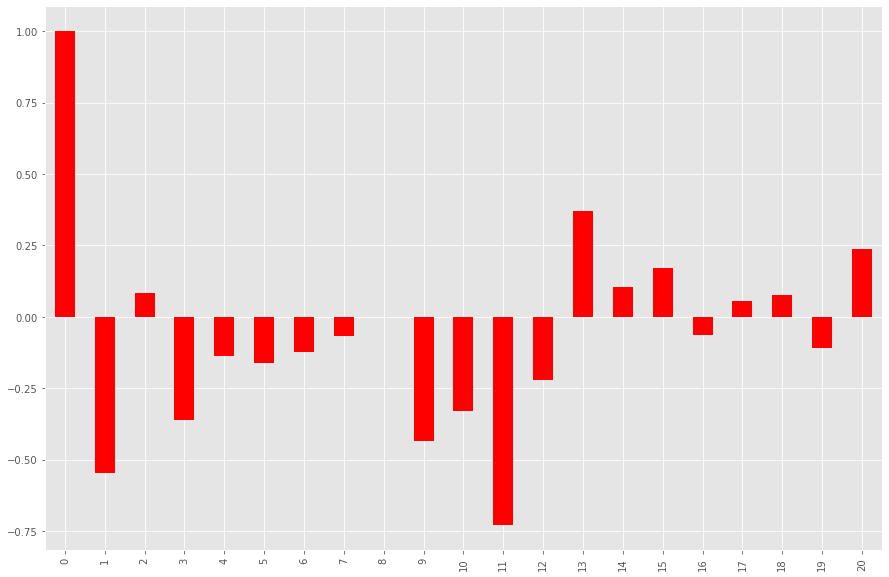

In [202]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

# 4) FORECAST

# APPLY THE LINEAR MODEL

In [203]:
df_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price,shift_log_priceMod,log_priceMod_diff
date,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,NaN,NaN
2005-01,275845,387,2005-01-01,5.958425,889.100239,6.744059,-0.785634
2006-01,228000,402,2006-01-01,5.996452,889.100239,5.958425,0.038027
2007-01,205200,997,2007-01-01,6.904751,889.100239,5.996452,0.908299
2008-01,267550,448,2008-01-01,6.104793,889.100239,6.904751,-0.799958


In [204]:
df1_mumbai=df_mumbai.drop(['shift_log_priceMod','log_priceMod_diff'],axis=1)

In [205]:
df1_mumbai.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 146 entries, 2004-01 to 2015-12
Freq: M
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   quantity      146 non-null    int64         
 1   priceMod      146 non-null    int64         
 2   date          146 non-null    datetime64[ns]
 3   log_priceMod  146 non-null    float64       
 4   mean_price    146 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.8 KB


In [213]:
df1_mumbai.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [209]:
df1_mumbai["timeindex"] = df_mumbai.date - df_mumbai.date.min()
df1_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0 days
2005-01,275845,387,2005-01-01,5.958425,889.100239,366 days
2006-01,228000,402,2006-01-01,5.996452,889.100239,731 days
2007-01,205200,997,2007-01-01,6.904751,889.100239,1096 days
2008-01,267550,448,2008-01-01,6.104793,889.100239,1461 days


In [214]:
df1_mumbai["timeindex"] = df1_mumbai["timeindex"]/np.timedelta64(1,"M")
df1_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0.000000
2005-01,275845,387,2005-01-01,5.958425,889.100239,12.024888
2006-01,228000,402,2006-01-01,5.996452,889.100239,24.016920
2007-01,205200,997,2007-01-01,6.904751,889.100239,36.008953
2008-01,267550,448,2008-01-01,6.104793,889.100239,48.000986


In [215]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df1_mumbai).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     129.3
Date:                Thu, 19 May 2022   Prob (F-statistic):           8.75e-22
Time:                        14:38:13   Log-Likelihood:                -96.105
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.077     77.799      0.000       5.875       6.182
timeindex      0.0105      0.001     11.372      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.052
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.792   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.0283932 , 6.15476395, 6.28078943, 6.4068149 , 6.53284038,
       6.65921113, 6.7852366 , 6.91126208, 7.03728755, 7.1636583 ,
       7.28968378, 7.41570925, 7.54173473, 6.03909673, 6.16546748,
       6.29149296, 6.41751843, 6.54354391, 6.66991466, 6.79594013,
       6.92196561, 7.04799108, 7.17436183, 7.30038731, 7.42641278,
       7.55243826, 6.04910972, 6.17513519, 6.30116067, 6.42718614,
       6.55355689, 6.67958237, 6.80560784, 6.93163332, 7.05800407,
       7.18402954, 7.31005502, 7.43608049, 6.05981325, 6.18583873,
       6.3118642 , 6.43788968, 6.56426043, 6.6902859 , 6.81631138,
       6.94233685, 7.0687076 , 7.19473308, 7.32075855, 7.44678403,
       6.07017151, 6.19619698, 6.32222246, 6.44824793, 6.57461868,
       6.70064416, 6.82666963, 6.95269511, 7.07906586, 7.20509133,
       7.33111681, 7.45714228, 6.08087504, 6.20690052, 6.33292599,
       6.45895147, 6.58532222, 6.71134769, 6.83737317, 6.96339864,
       7.08976939, 7.21579487, 7.34182034, 7.46784582, 6.09123

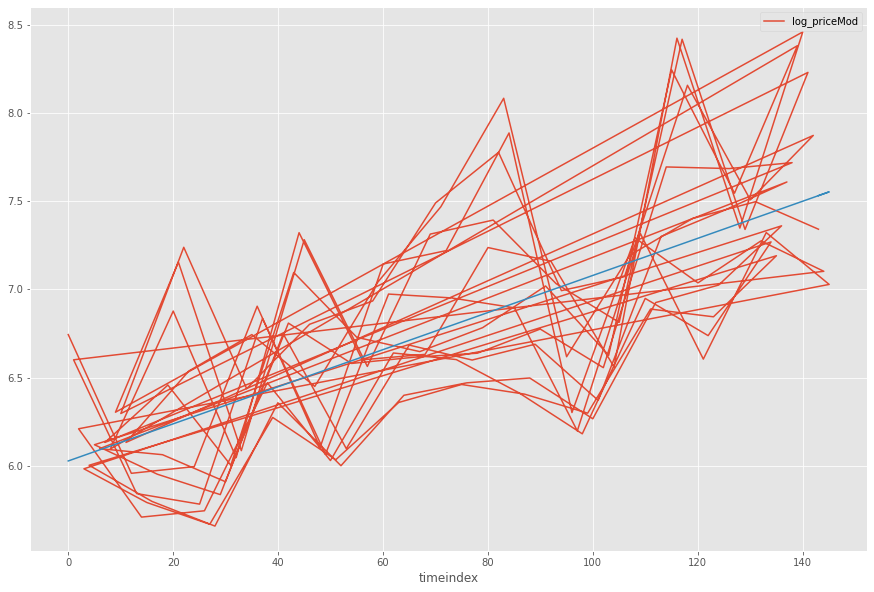

In [217]:
df1_mumbai.plot(kind = "line", x="timeindex", y="log_priceMod")
plt.plot(df1_mumbai.timeindex, linear_model_pred)

<AxesSubplot:xlabel='date'>

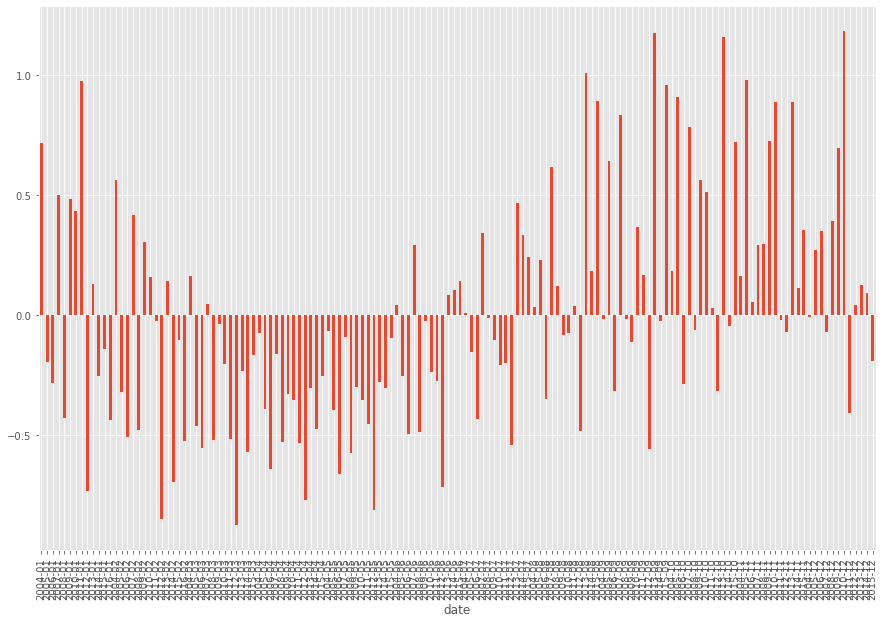

In [218]:
linear_model.resid.plot(kind="bar")

In [220]:
df1_mumbai["linear_price"] = np.exp(linear_model_pred)
df1_mumbai.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0.000000,415.047595
2005-01,275845,387,2005-01-01,5.958425,889.100239,12.024888,470.955661
2006-01,228000,402,2006-01-01,5.996452,889.100239,24.016920,534.210217
2007-01,205200,997,2007-01-01,6.904751,889.100239,36.008953,605.960560
2008-01,267550,448,2008-01-01,6.104793,889.100239,48.000986,687.347767


In [221]:
linear_model_RMSE = RMSE(df1_mumbai.priceMod, df1_mumbai.linear_price)
linear_model_RMSE

724.6662938231528